In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/modeldata4supply/ModelData4Supply.csv
/kaggle/input/listings/listings.csv
/kaggle/input/airbnbliked/Liked.csv
/kaggle/input/cantrent/CantRent.csv
/kaggle/input/calendar/calendar.csv
/kaggle/input/nyc-map/Neighbourhoods_New_York_City_Map.png
/kaggle/input/pulled/Pulled.csv
/kaggle/input/reviews/reviews.csv


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [13]:
path = "../input/listings/"

filename_read = os.path.join(path, "listings.csv")
df=pd.read_csv(filename_read, na_values=['NA','?','NaN'])
df = df.reindex(np.random.permutation(df.index))
df=df.interpolate(method='linear')

In [14]:
path = "../input/reviews/"

filename_read = os.path.join(path, "reviews.csv")
df2=pd.read_csv(filename_read, na_values=['NA','?','NaN'])
df2 = df2.reindex(np.random.permutation(df2.index))
df2=df2.interpolate(method='linear')

In [15]:
path = "../input/pulled/"

filename_read = os.path.join(path, "Pulled.csv")
df3=pd.read_csv(filename_read, na_values=['NA','?','NaN'])
df3 = df3.reindex(np.random.permutation(df3.index))
df3=df3.interpolate(method='linear')

In [3]:
path = "../input/calendar/"

filename_read = os.path.join(path, "calendar.csv")
df4=pd.read_csv(filename_read, na_values=['NA','?','NaN'])
df4 = df4.reindex(np.random.permutation(df4.index))
df4=df4.interpolate(method='linear')

KeyboardInterrupt: 

In [3]:
path = "../input/airbnbliked/"

filename_read = os.path.join(path, "Liked.csv")
df5=pd.read_csv(filename_read, na_values=['NA','?','NaN'])
df5 = df5.reindex(np.random.permutation(df5.index))
df5=df5.interpolate(method='linear')

In [6]:
path = "../input/cantrent/"

filename_read = os.path.join(path, "CantRent.csv")
df6=pd.read_csv(filename_read, na_values=['NA','?','NaN'])
df6 = df6.reindex(np.random.permutation(df6.index))
df6=df6.interpolate(method='linear')

In [25]:
path = "../input/modeldata4supply/"

filename_read = os.path.join(path, "ModelData4Supply.csv")
df7=pd.read_csv(filename_read, na_values=['NA','?','NaN'])
df7 = df7.reindex(np.random.permutation(df7.index))
df7=df7.interpolate(method='linear')

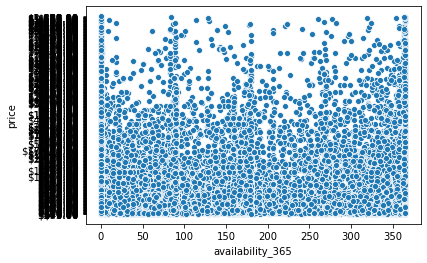

In [17]:
sns.scatterplot(x=df['availability_365'], y=df['price']);

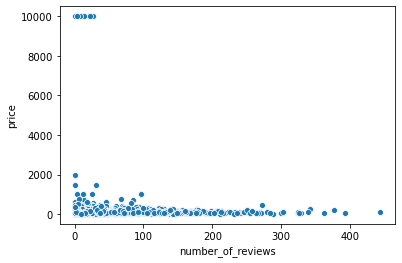

In [18]:
sns.scatterplot(x=df3['number_of_reviews'], y=df3['price']);

[Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '61391963'),
 Text(0, 0, '48005494'),
 Text(0, 0, '51501835'),
 Text(0, 0, '19303369'),
 Text(0, 0, '30283594'),
 Text(0, 0, '22541573'),
 Text(0, 0, '9419684'),
 Text(0, 0, '334163301')]

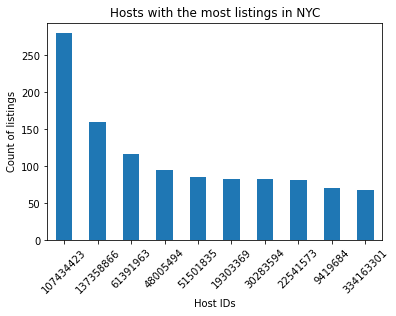

In [19]:
top_host=df.host_id.value_counts().head(10)
top_host
top_host_check=df.calculated_host_listings_count.max()
top_host_check

viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [21]:
df3.neighbourhood_group_cleansed.value_counts().head(10)

Brooklyn         1310
Manhattan        1292
Queens            297
Bronx              54
Staten Island      10
Name: neighbourhood_group_cleansed, dtype: int64

In [23]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df3.nlargest(10,'number_of_reviews')
top_reviewed_listings

,Unnamed: 0,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,Pre_20_reviews,Post_20_reviews,ForRent
173,174,4152752,21546973,2014-09-20,98.333333,100.0,t,1,1,t,...,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,6.40,8,0,f
133,134,2760968,14120733,2014-04-10,100.000000,96.0,t,1,1,t,...,10.0,10.0,10.0,10.0,10.0,moderate,5.28,5,0,f
34,35,479867,2377104,2012-05-15,100.000000,100.0,t,2,2,t,...,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,3.84,11,1,f
177,178,4226098,21930989,2014-09-29,100.000000,99.0,f,2,2,t,...,9.0,10.0,10.0,10.0,9.0,strict_14_with_grace_period,5.31,14,1,f
323,324,8615062,45319781,2015-09-28,100.000000,96.0,t,1,1,f,...,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,6.03,15,1,f
887,888,21366188,154705359,2017-10-15,100.000000,96.0,t,1,1,f,...,10.0,10.0,10.0,10.0,10.0,moderate,10.90,10,0,f
456,457,13246804,4832845,2013-01-24,100.000000,74.0,t,1,1,t,...,10.0,10.0,10.0,10.0,10.0,moderate,6.84,10,0,f
333,334,8899476,3441272,2012-09-01,60.000000,78.0,t,3,3,t,...,10.0,10.0,10.0,9.0,10.0,moderate,5.75,12,2,f
47,48,690960,3531317,2012-09-10,100.000000,100.0,t,2,2,t,...,10.0,10.0,10.0,9.0,10.0,moderate,3.44,4,1,f
138,139,3004348,15310896,2014-05-09,100.000000,97.0,f,1,1,t,...,9.0,10.0,10.0,9.0,9.0,moderate,4.41,12,0,f


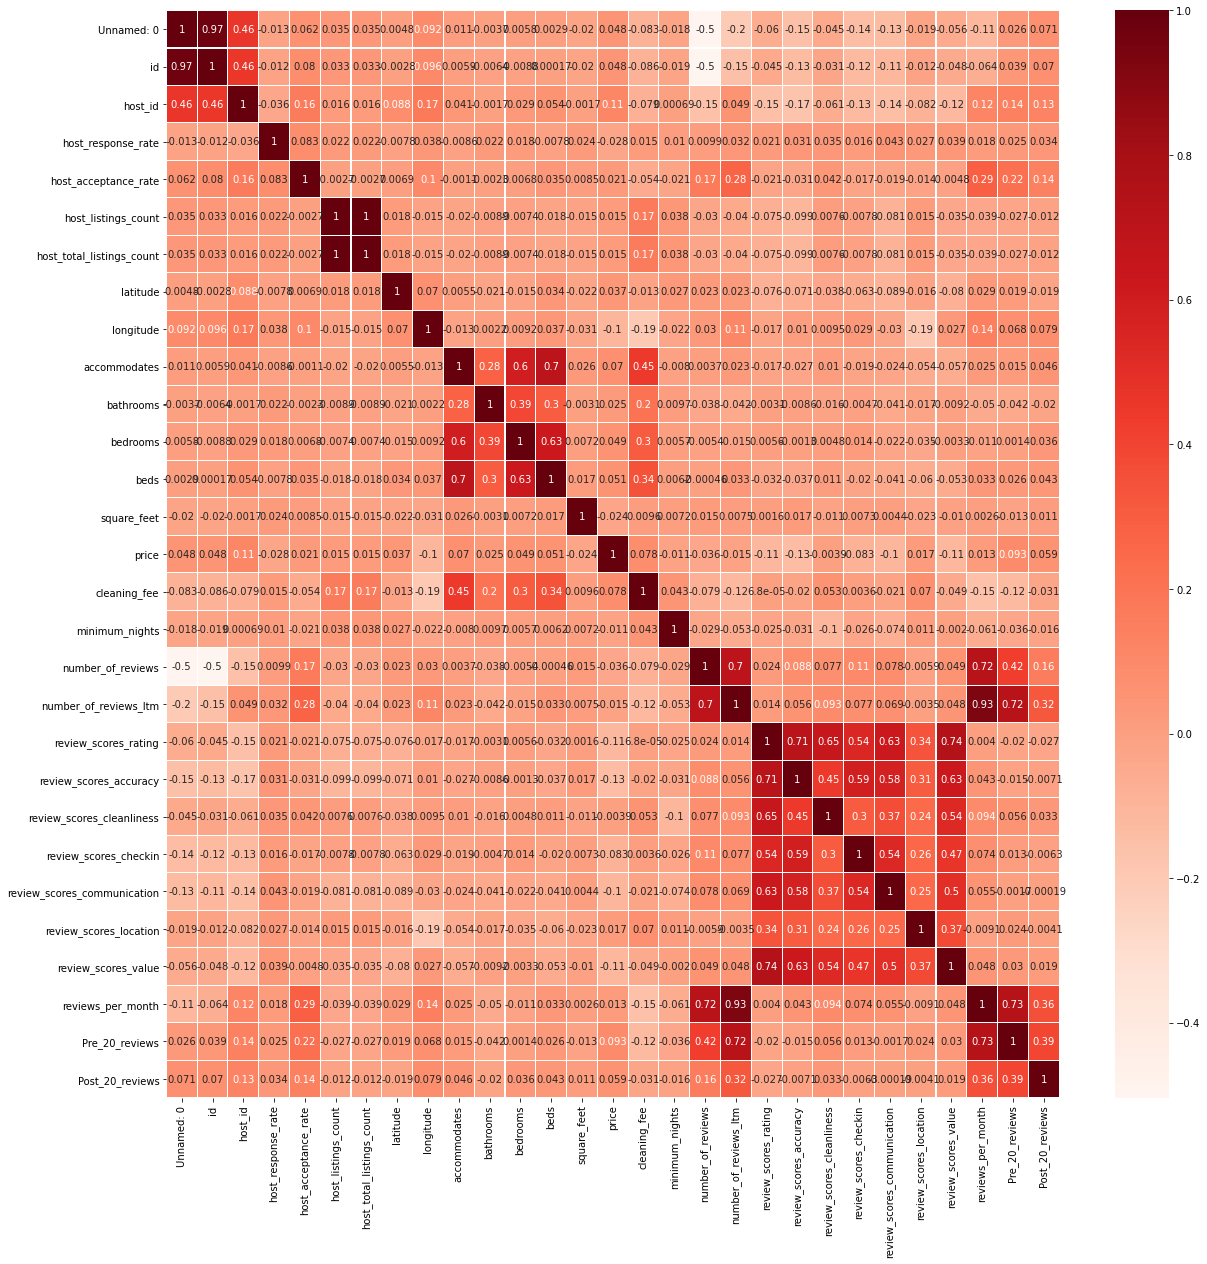

In [30]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(df3.corr(),annot=True,linewidths=0.1,cmap='Reds')

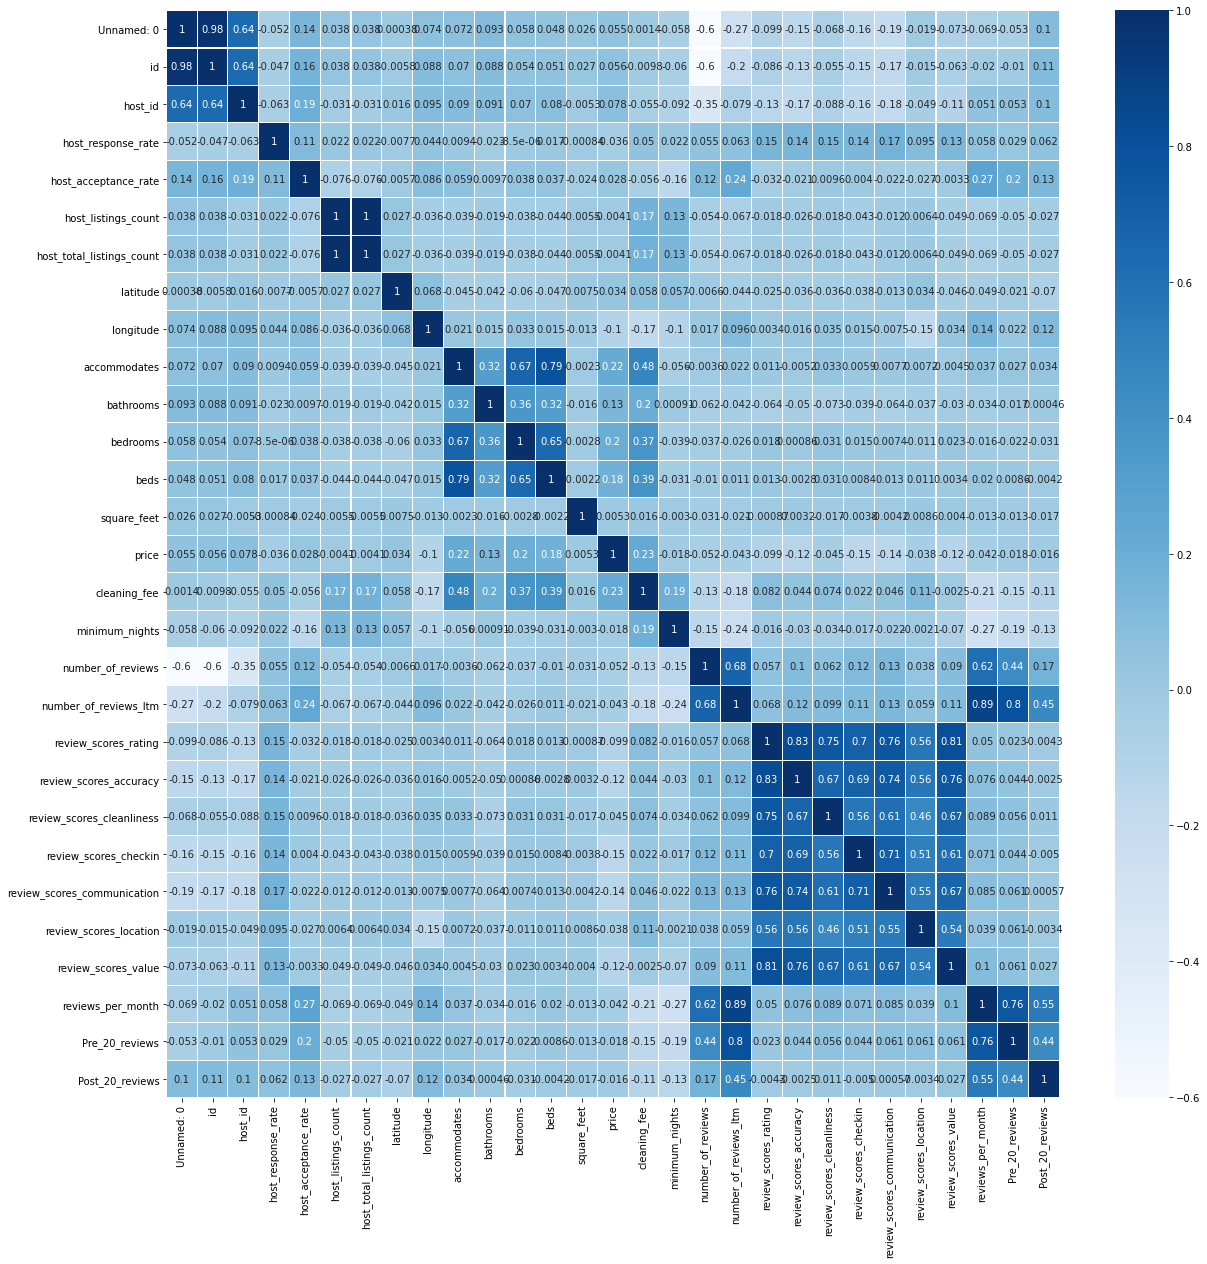

In [4]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(df5.corr(),annot=True,linewidths=0.1,cmap='Blues')

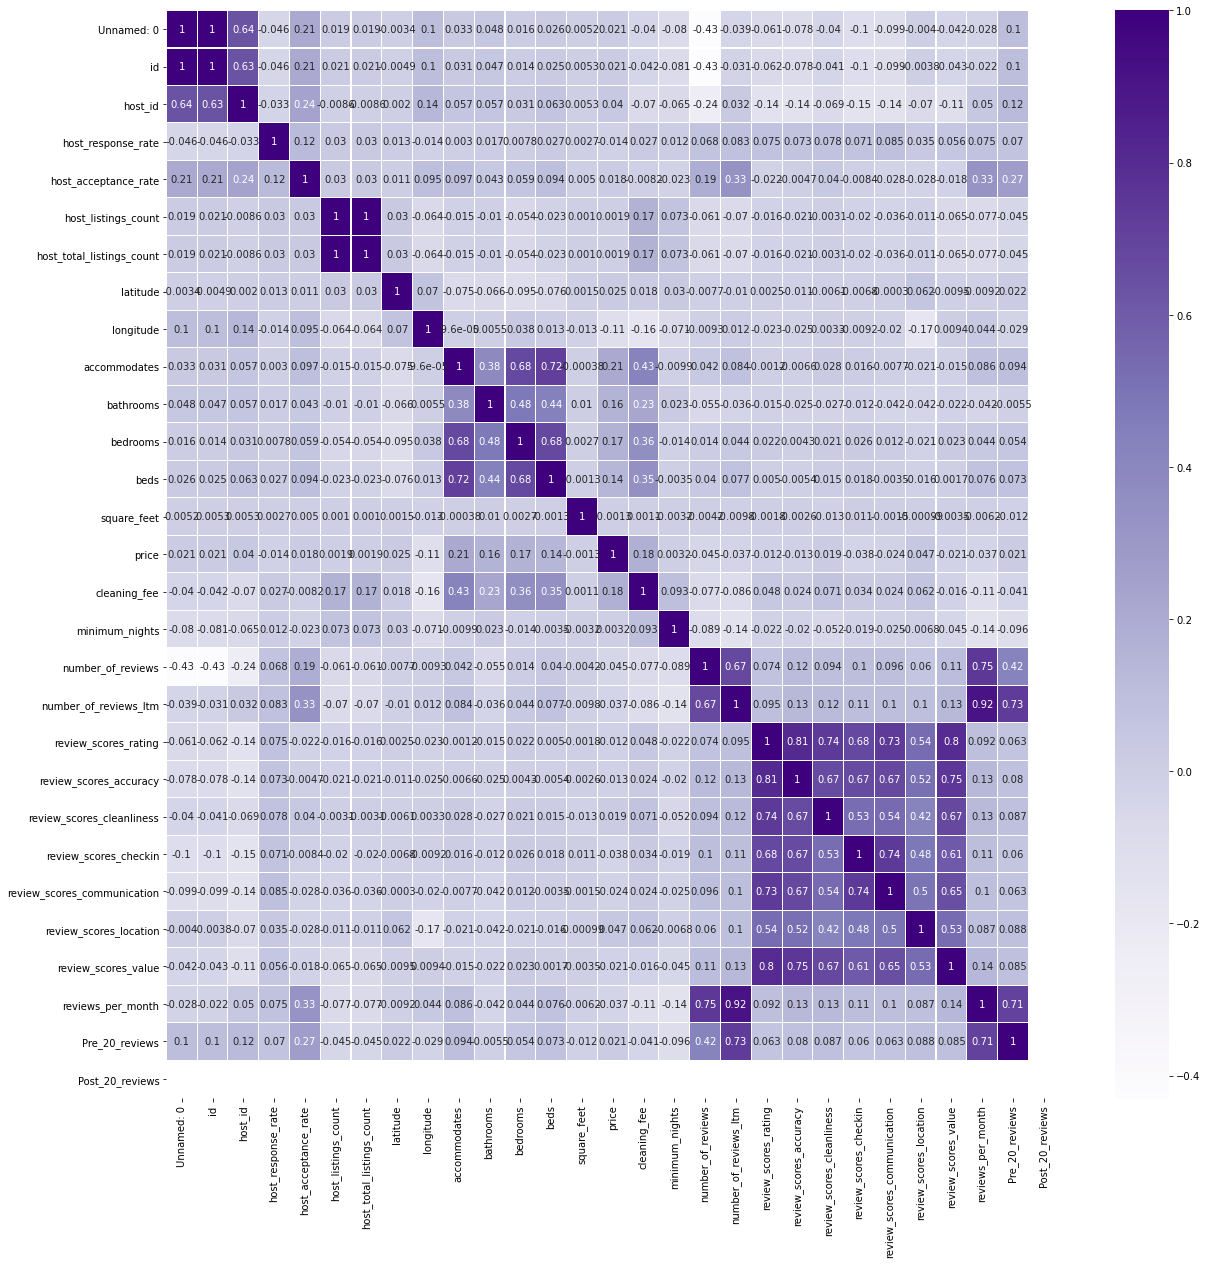

In [7]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(df6.corr(),annot=True,linewidths=0.1,cmap='Purples')

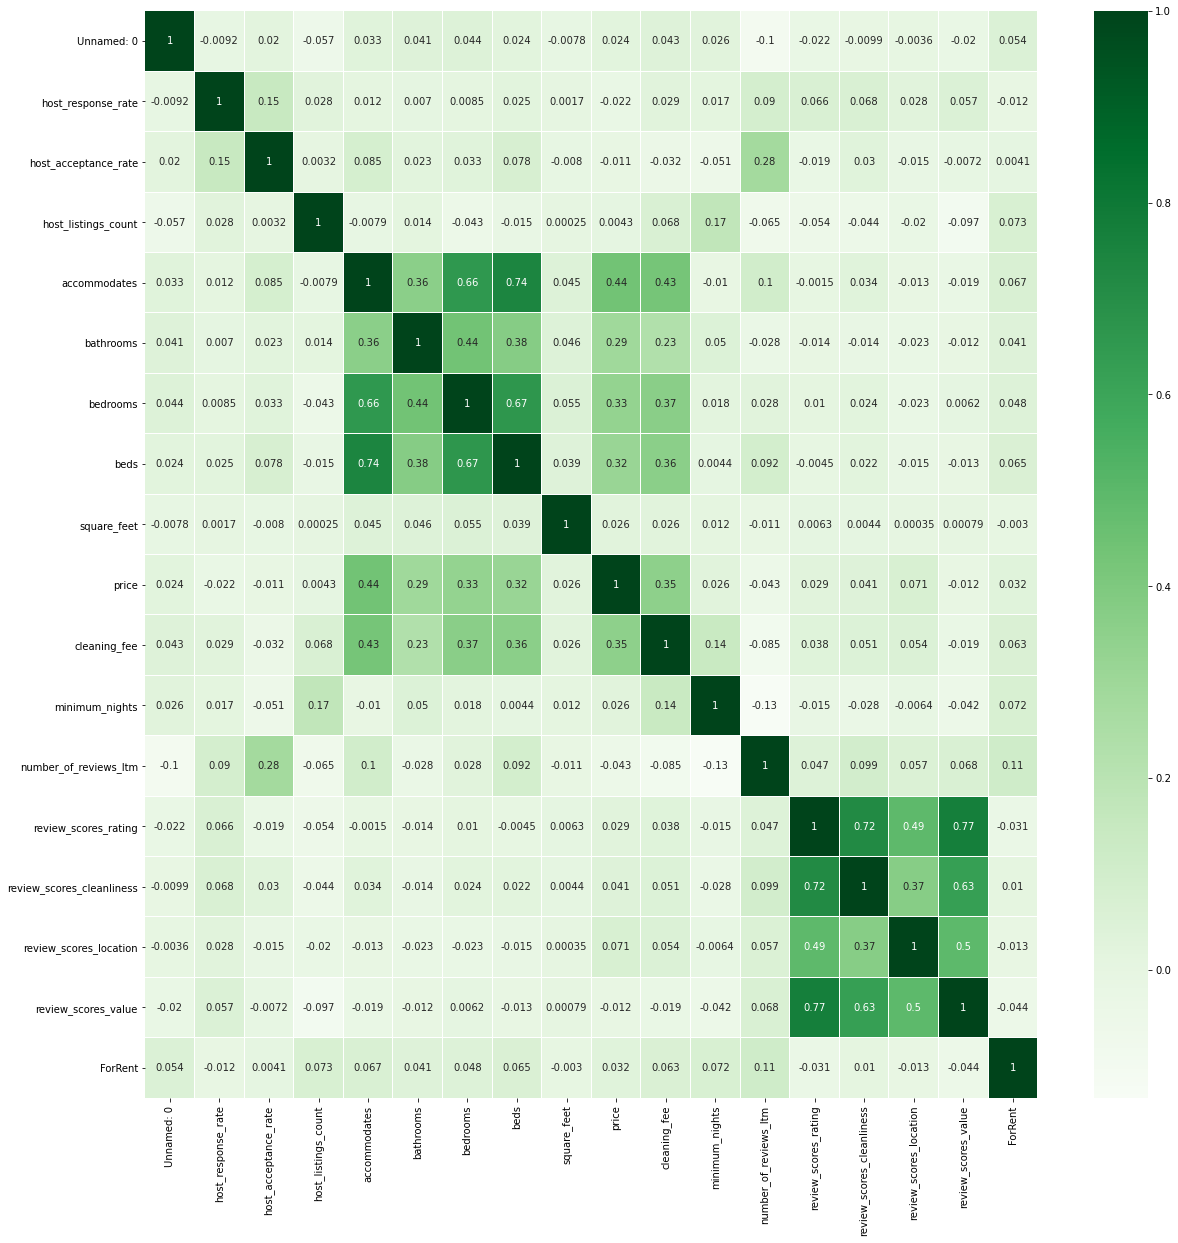

In [9]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(df7.corr(),annot=True,linewidths=0.1,cmap='Greens')

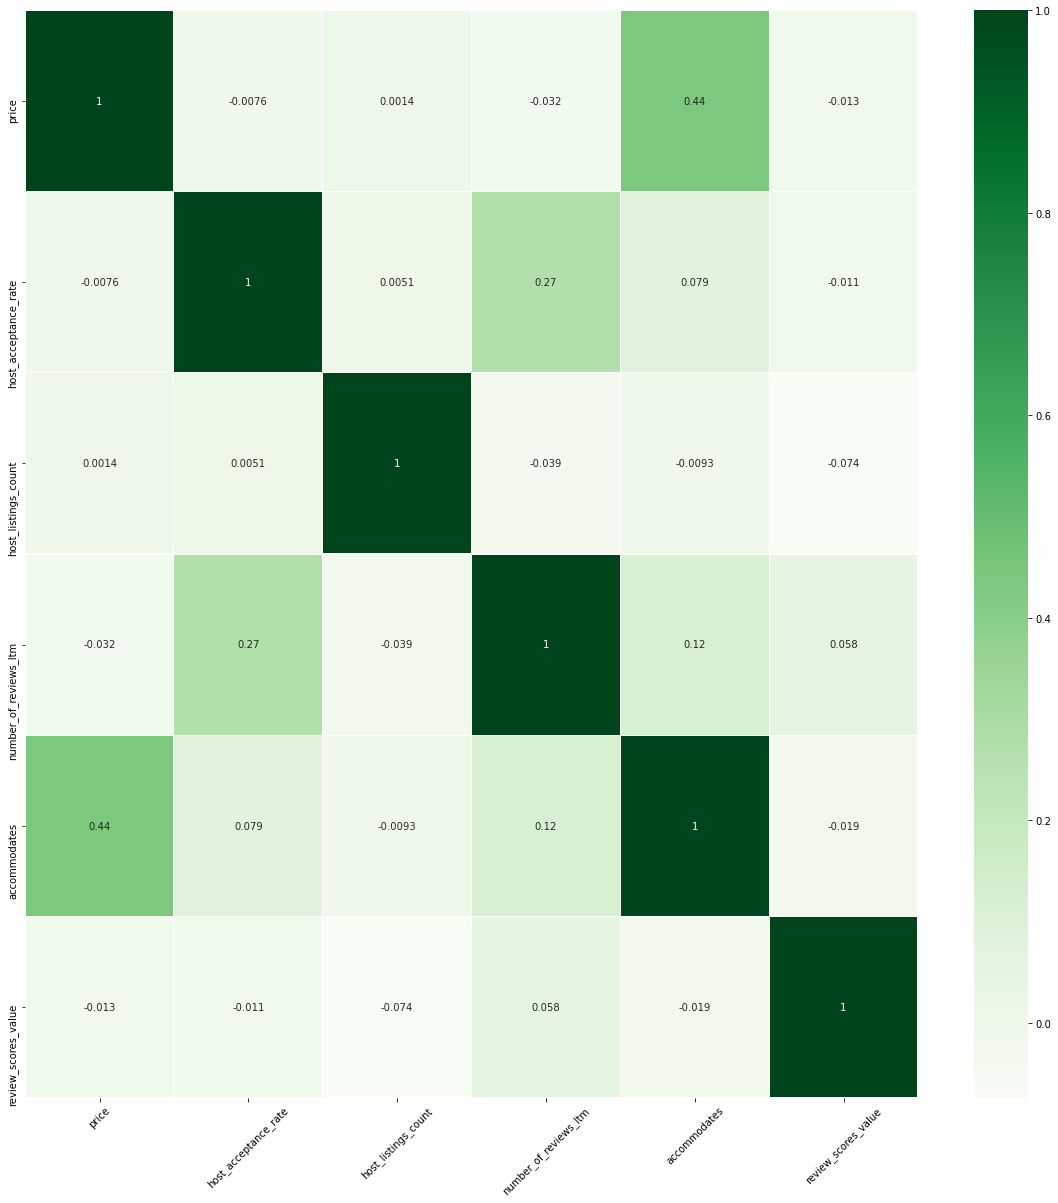

In [19]:
df7 = df7[df7.ForRent ==0]

plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(df7.corr(),annot=True,linewidths=0.1,cmap='Greens')


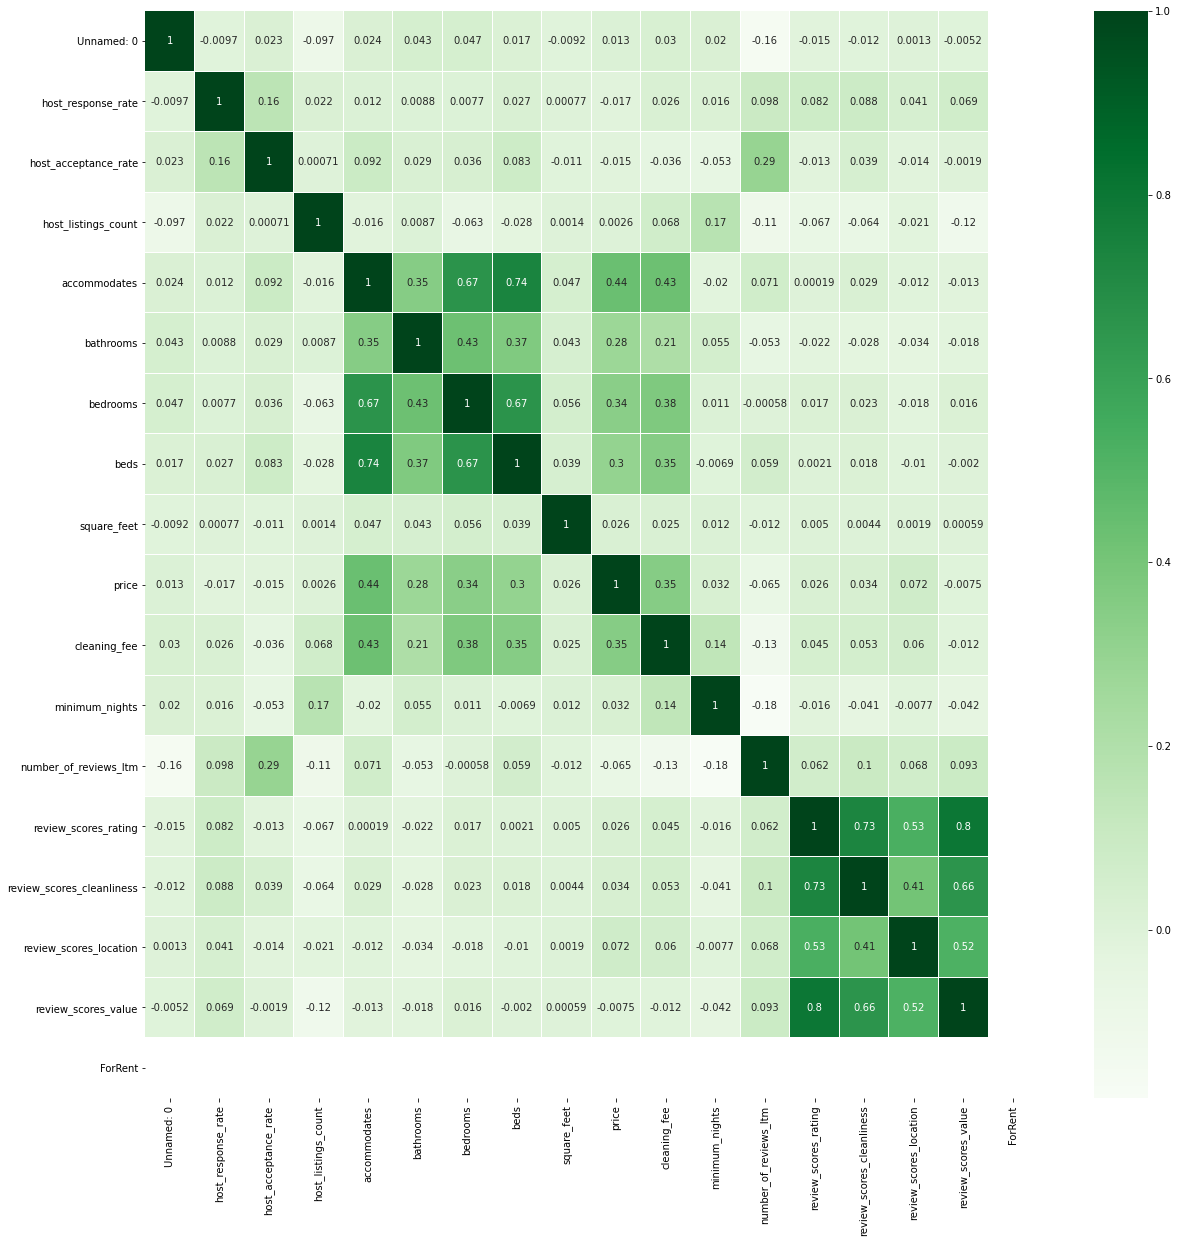

In [24]:
df7 = df7[df7.ForRent ==1]

plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(df7.corr(),annot=True,linewidths=0.1,cmap='Greens')

Text(0.5, 1.0, 'Number of listings in each neighborhood per room types')

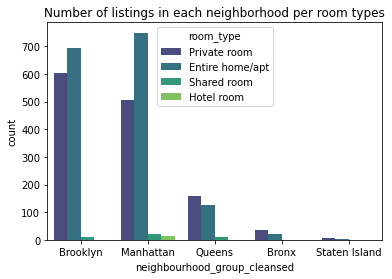

In [32]:
# number of listings per neighborhood group, categorized by room type
sns.countplot(x='neighbourhood_group_cleansed',data=df3,hue='room_type',palette='viridis')
plt.title('Number of listings in each neighborhood per room types')

Text(0.5, 1.0, 'Price Distribution per Neighborhood Group')

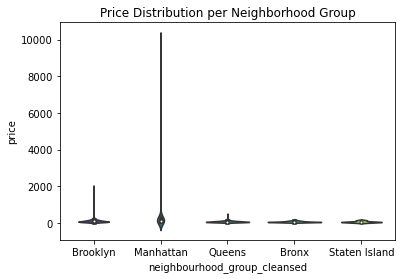

In [33]:
# price distribution per neighborhood group, a quick overview
sns.violinplot(x='neighbourhood_group_cleansed',y='price',data=df3,palette='viridis')
plt.title('Price Distribution per Neighborhood Group')

Text(0, 0.5, 'Frequency')

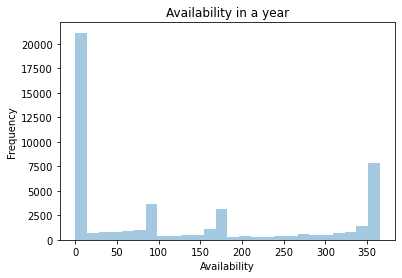

In [35]:
# check the distribution of listing availability
sns.distplot(df['availability_365'],kde=False)
plt.title('Availability in a year')
plt.xlabel('Availability')
plt.ylabel('Frequency')

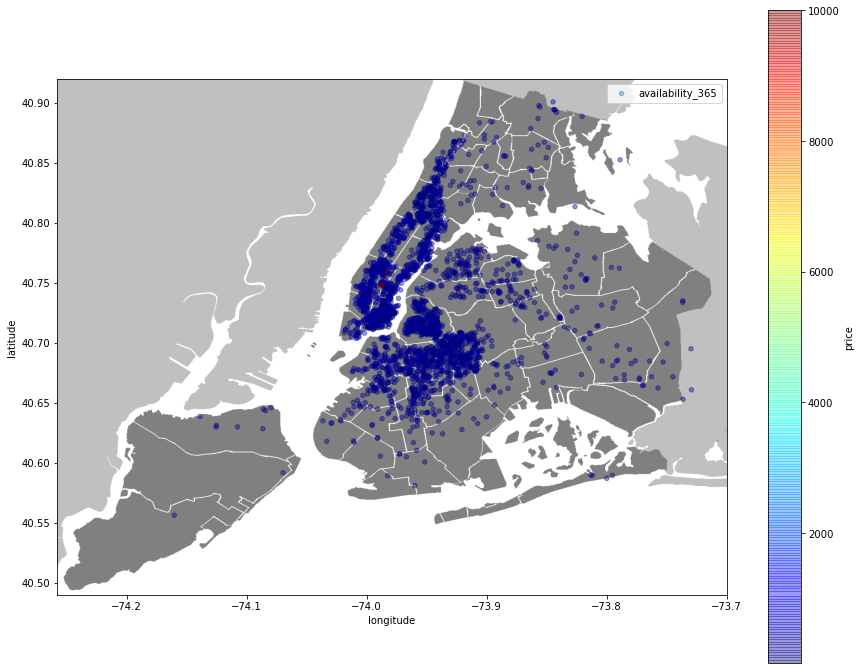

In [53]:
import urllib
#initializing the figure size
plt.figure(figsize=(15,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df3.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

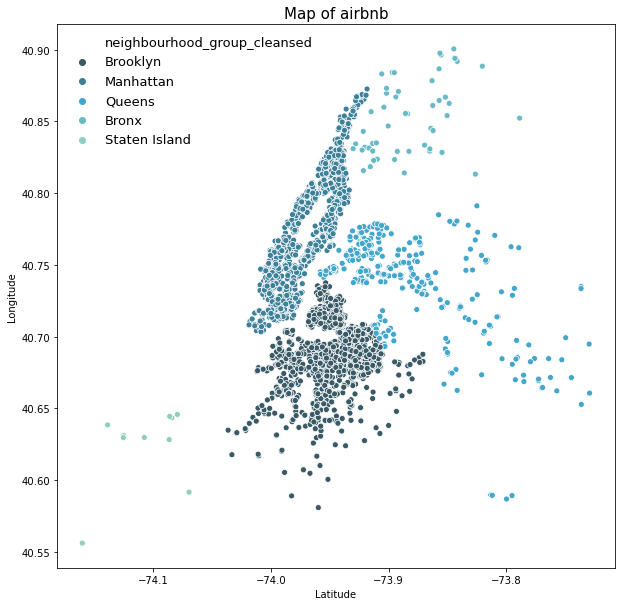

In [52]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df3, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

In [ ]:
import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline

In [59]:
df4["price"] = df4["price"].apply(lambda x: str(x).replace("$", ""))
df4["price"] = pd.to_numeric(df4["price"] , errors="coerce")
data  = df4.groupby("date")[["price"]].sum()
data["mean"]  = df4.groupby("date")[["price"]].mean()
data.columns = ["Total", "Average"]
data.head()

,Total,Average
date,,
2020-06-08,1594215.0,116.510634
2020-06-09,5788119.0,133.256262
2020-06-10,6367718.0,129.372572
2020-06-11,6361009.0,129.246769
2020-06-12,6485291.0,131.820216


In [60]:
data2 = df4.set_index("date")
data2.index = pd.to_datetime(data2.index)
data2 =  data2[["price"]].resample("M").mean()
data2.head()

,price
date,
2020-06-30,130.536356
2020-07-31,133.942329
2020-08-31,135.637688
2020-09-30,137.321430
2020-10-31,139.374905


In [61]:
trace1 = go.Scatter(
    x = data.index,
    y = data["Total"]
)
data_frame = [trace1]
layout = go.Layout(
    title = "Price by each time",
    xaxis  = dict(title = "Time"),
    yaxis = dict(title = "Total ($)")
)
trace2 = go.Scatter(
    x = data.index,
    y = data["Average"]
)

data_frame2 = [trace2]
layout2 = go.Layout(
    title = "Price by each time",
    xaxis  = dict(title = "Time"),
    yaxis = dict(title = "Mean ($)")
)
fig = go.Figure(data = data_frame, layout = layout)
fig2 = go.Figure(data = data_frame2, layout = layout2)
offline.iplot(fig)

In [62]:
trace3 = go.Scatter(
    x = data2.index[:-1],
    y = data2.price[:-1]
)
layout3 = go.Layout(
    title = "Average price by month",
    xaxis = dict(title = "time"),
    yaxis = dict(title = "Price")
)
data_frame3 = [trace3]
fig3 = go.Figure(data= data_frame3, layout= layout3)
offline.iplot(fig3)

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
def draw_interactive_graph(mode):
    df4.index = pd.to_datetime(df4.index)
    decomposition = seasonal_decompose(df4[[mode]])
    trace4_1 = go.Scatter(
        x = decomposition.observed.index, 
        y = decomposition.observed[mode],
        name = "Observed"
    )
    trace4_2 = go.Scatter(
        x = decomposition.trend.index,
        y = decomposition.trend[mode],
        name = "Trend"
    )
    trace4_3 = go.Scatter(
        x = decomposition.seasonal.index,
        y = decomposition.seasonal[mode],
        name = "Seasonal"
    )
    trace4_4 = go.Scatter(
        x = decomposition.resid.index,
        y = decomposition.resid[mode],
        name = "Resid"
    )

    fig = py.tools.make_subplots(rows=4, cols=1, subplot_titles=('Observed', 'Trend',
                                                              'Seasonal', 'Residiual'))
    # append trace into fig
    fig.append_trace(trace4_1, 1, 1)
    fig.append_trace(trace4_2, 2, 1)
    fig.append_trace(trace4_3, 3, 1)
    fig.append_trace(trace4_4, 4, 1)

    fig['layout'].update( title='Descompose with TimeSeri')
    offline.iplot(fig)